In [2]:
import keras
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier 
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV


In [4]:
def readucr(filename):
    data = np.loadtxt(filename, delimiter="\t")
    y = data[:, 0]
    x = data[:, 1:]
    return x, y.astype(int)


root_url = "https://raw.githubusercontent.com/hfawaz/cd-diagram/master/FordA/"

x_train, y_train = readucr(root_url + "FordA_TRAIN.tsv")
x_test, y_test = readucr(root_url + "FordA_TEST.tsv")


In [5]:
#normalized negative output to 0 
y_train[y_train == -1] = 0
y_test[y_test == -1] = 0

Accuracy: 0.4962121212121212
              precision    recall  f1-score   support

           0       0.51      0.51      0.51       681
           1       0.48      0.48      0.48       639

    accuracy                           0.50      1320
   macro avg       0.50      0.50      0.50      1320
weighted avg       0.50      0.50      0.50      1320



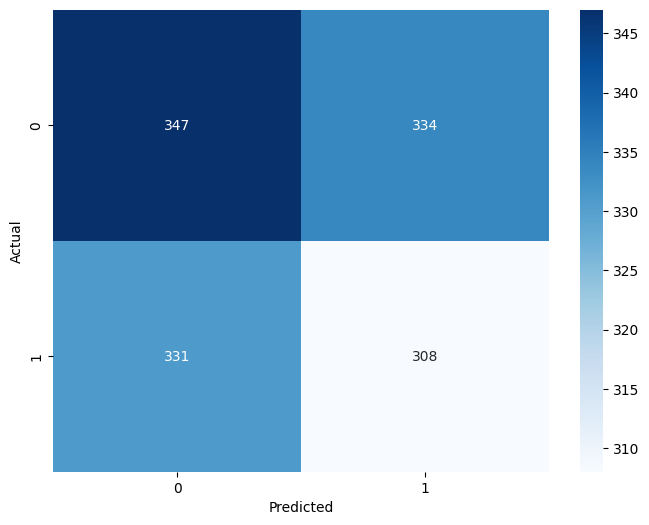

In [4]:
model_sk = SGDClassifier()
model_sk.fit(x_train, y_train)
y_hat = model_sk.predict(x_test)
accuracy = accuracy_score(y_test, y_hat)
report = classification_report(y_test, y_hat)
conf_matrix = confusion_matrix(y_test, y_hat)
# Affichez l'exactitude et le rapport de classification
print(f"Accuracy: {accuracy}")
print(report)

# Affichez la matrice de confusion
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Régression Logistique - Accuracy: 0.48787878787878786
Gradient Boosting (fine-tuned) - Accuracy: 0.48787878787878786


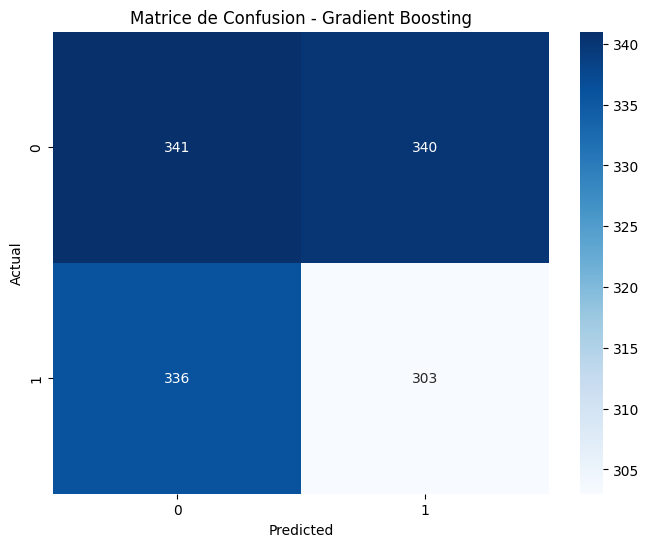

best parameters: 
{'learning_rate': 'optimal', 'loss': 'log_loss', 'max_iter': 2000}


In [25]:
# Modèle alternatif : Classificateur Gradient Boosting
gradient_boosting_model = SGDClassifier()

# Définissez la grille des hyperparamètres à ajuster
param_grid = {
    'loss': ['log_loss'],
    'learning_rate': ['optimal'],
    'max_iter': [2000]
}

# Utilisez GridSearchCV pour rechercher les meilleurs hyperparamètres
grid_search = GridSearchCV(gradient_boosting_model, param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(x_train, y_train)

# Meilleurs hyperparamètres trouvés
best_params = grid_search.best_params_

# Entraînez le modèle Gradient Boosting avec les meilleurs hyperparamètres
best_gradient_boosting_model = SGDClassifier(**best_params)
best_gradient_boosting_model.fit(x_train, y_train)

# Prédisez les étiquettes sur l'ensemble de test avec le modèle Gradient Boosting optimisé
y_pred_gradient_boosting = best_gradient_boosting_model.predict(x_test)

# Évaluez les performances des deux modèles
accuracy_logistic = accuracy_score(y_test, y_pred_gradient_boosting)
accuracy_gradient_boosting = accuracy_score(y_test, y_pred_gradient_boosting)

print("Régression Logistique - Accuracy:", accuracy_logistic)
print("Gradient Boosting (fine-tuned) - Accuracy:", accuracy_gradient_boosting)

# Affichez la matrice de confusion pour le modèle Gradient Boosting
conf_matrix_gb = confusion_matrix(y_test, y_pred_gradient_boosting)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_gb, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matrice de Confusion - Gradient Boosting')
plt.show()

print("best parameters: ")
print(best_params)

In [ ]:
from catboost import CatBoostClassifier

# catboost = CatBoostClassifier()

# Définissez la grille des hyperparamètres à ajuster
param_grid = {
    'iterations': [1000],
    'depth': [10],
    'learning_rate' : [0.1]

}


# Utilisez GridSearchCV pour rechercher les meilleurs hyperparamètres
# grid_search2 = GridSearchCV(catboost, param_grid, cv=3, n_jobs=-1, verbose=2)
# grid_search2.fit(x_train, y_train)

# Meilleurs hyperparamètres trouvés
# best_params = grid_search2.best_params_

# Entraînez le modèle cat avec les meilleurs hyperparamètres
best_cat_boosting_model = CatBoostClassifier(iterations = 500,
                                             depth= 10,
                                             learning_rate= 0.05,
                                             task_type='GPU')
best_cat_boosting_model.fit(x_train, y_train)

# Prédisez les étiquettes sur l'ensemble de test avec le modèle cat optimisé
y_pred_cat_boosting = best_cat_boosting_model.predict(x_test)

# Évaluez les performances des deux modèles
accuracy_cat_boosting = accuracy_score(y_test, y_pred_cat_boosting)


print("catBoosting (fine-tuned) - Accuracy:", accuracy_cat_boosting)

# Affichez la matrice de confusion pour le modèle cat
conf_matrix_cat = confusion_matrix(y_test, y_pred_cat_boosting)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_cat, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Matrice de Confusion - catboost')
plt.show()

# print("best parameters: ")
# print(best_params)

: 

{'depth': 8, 'iterations': 300, 'learning_rate': 0.1} 81%

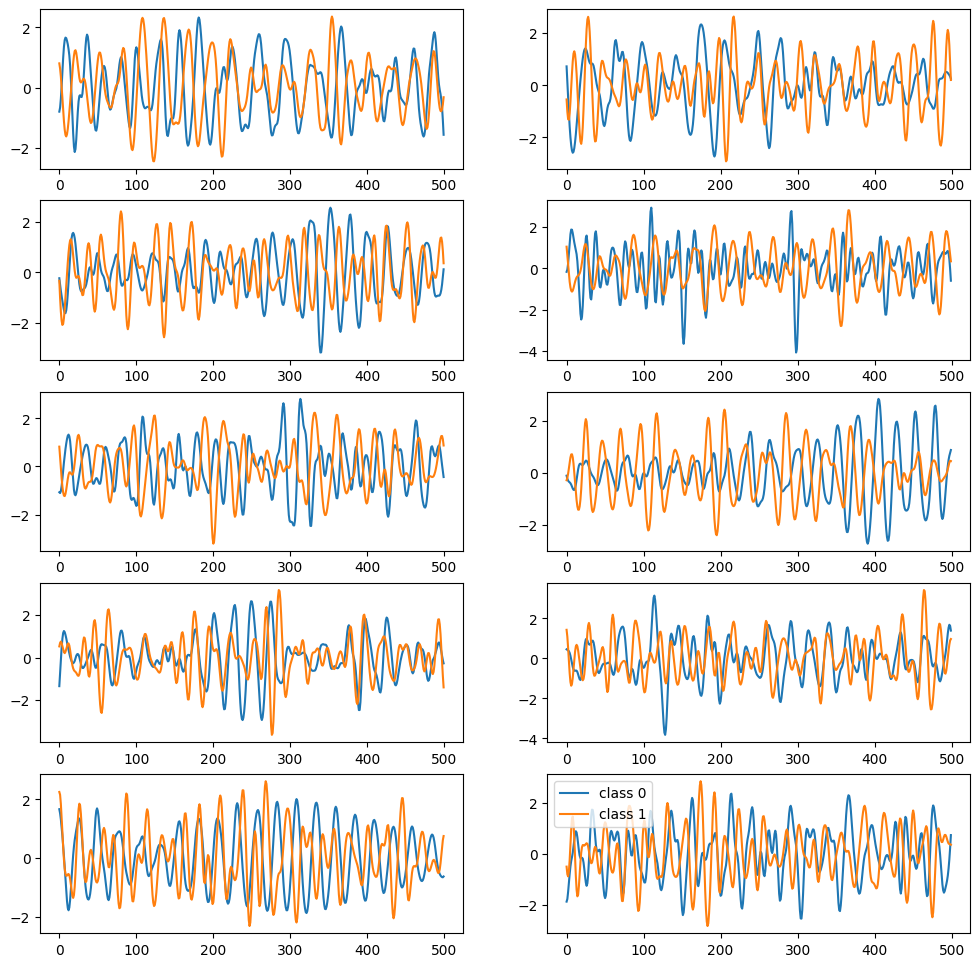

In [43]:
classes = np.unique(np.concatenate((y_train, y_test), axis=0))

plt.figure(figsize=(12,12))
for c in classes:
    c_x_train = x_train[y_train == c]
    for i in range(10):
        plt.subplot(5,2,i+1)
        plt.plot(c_x_train[i], label="class " + str(c))
plt.legend(loc="best")

In [37]:
x_train_ff = np.fft.fft(x_train)
x_train_ff.shape

(3601, 500)

c:\Users\simplet\Projects\Course_Data\simplon_datai_2025\.venv\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\simplet\Projects\Course_Data\simplon_datai_2025\.venv\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


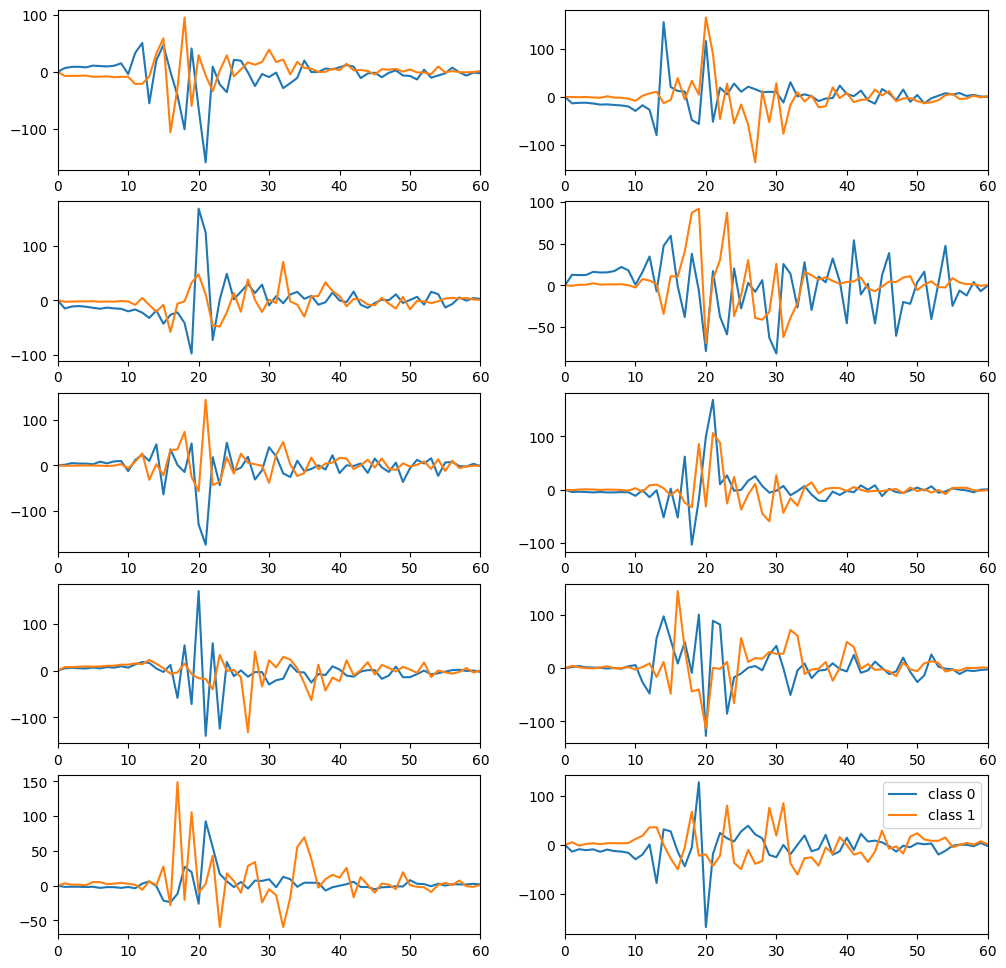

In [44]:
x_0 = []
x_1 = []

x_0 = x_train_ff[y_train == 0]
x_1 = x_train_ff[y_train == 1]
plt.figure(figsize=(12,12))
for i in range(10):
            plt.subplot(5,2,i+1)
            plt.plot(x_0[i], label="class 0")
            plt.plot(x_1[i], label="class 1")
            plt.xlim(left=0, right = 60)

plt.legend()



In [6]:
#Reshaping the data from (3100,500,) to (3100,500,1)
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], 1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], 1))


In [7]:
#extracting number of classes , enabling to use sparse_categorical_crossentropy
num_classes = len(np.unique(y_train))

num_classes

2

In [ ]:
#permutation, hoping to avoid series biais 
idx = np.random.permutation(len(x_train))
x_train = x_train[idx]
y_train = y_train[idx]

In [ ]:
#normalized negative output to 0 
y_train[y_train == -1] = 0
y_test[y_test == -1] = 0


In [ ]:
#model
def make_model(input_shape):
    input_layer = keras.layers.Input(input_shape)

    
    conv1 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(input_layer)
    conv1 = keras.layers.BatchNormalization()(conv1)
    conv1 = keras.layers.ReLU()(conv1)

    conv2 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv1)
    conv2 = keras.layers.BatchNormalization()(conv2)
    conv2 = keras.layers.ReLU()(conv2)

    conv3 = keras.layers.Conv1D(filters=64, kernel_size=3, padding="same")(conv2)
    conv3 = keras.layers.BatchNormalization()(conv3)
    conv3 = keras.layers.ReLU()(conv3)

    gap = keras.layers.GlobalAveragePooling1D()(conv3)

    output_layer = keras.layers.Dense(num_classes, activation="softmax")(gap)

    return keras.models.Model(inputs=input_layer, outputs=output_layer)


model = make_model(input_shape=x_train.shape[1:])
keras.utils.plot_model(model, show_shapes=True)


In [ ]:
#Train the model 
epochs = 500
batch_size = 32

callbacks = [
    keras.callbacks.ModelCheckpoint(
        "best_model.keras", save_best_only=True, monitor="val_loss"
    ),
    keras.callbacks.ReduceLROnPlateau(
        monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001
    ),
    keras.callbacks.EarlyStopping(monitor="val_loss", patience=50, verbose=1),
]
model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["sparse_categorical_accuracy"],
)
history = model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=epochs,
    callbacks=callbacks,
    validation_split=0.2,
    verbose=1,
)

In [ ]:
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    print("GPU detected")
else:
    print("GPU not detected")